In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

karasjok no
busselton au
puerto ayora ec
brignoles fr
kadykchan ru
cidreira br
punta arenas cl
cherskiy ru
samusu ws
ilulissat gl
punta arenas cl
sao gabriel da cachoeira br
mys shmidta ru
nagato jp
upernavik gl
avarua ck
puerto ayora ec
illoqqortoormiut gl
deputatskiy ru
illoqqortoormiut gl
albany au
mataura pf
hirara jp
mwinilunga zm
esperance au
ushuaia ar
nikolskoye ru
kirakira sb
ushuaia ar
hilo us
mataura pf
la rioja ar
pevek ru
rikitea pf
saint anthony ca
hermanus za
arraial do cabo br
katsuura jp
busselton au
dno ru
ouadda cf
dikson ru
mabaruma gy
bilibino ru
buchanan lr
torbay ca
avarua ck
punta arenas cl
castro cl
mataura pf
kathu th
jamestown sh
yagodnoye ru
bambanglipuro id
falealupo ws
bluff nz
albany au
klaksvik fo
jamestown sh
taolanaro mg
busselton au
xai-xai mz
samusu ws
jamestown sh
punta arenas cl
hofn is
sola vu
albany au
hirara jp
kaitangata nz
butaritari ki
hermanus za
afonso claudio br
effingham us
qaanaaq gl
pierre us
vaitupu wf
taksimo ru
iquique cl
vaini to
pu

khatanga ru
bluff nz
airai pw
puerto madero mx
ambilobe mg
kodiak us
urumqi cn
taolanaro mg
te anau nz
hithadhoo mv
nizhneyansk ru
barrow us
bluff nz
carnarvon au
mataura pf
punta arenas cl
kushmurun kz
albany au
hilo us
ust-kut ru
ushuaia ar
port lincoln au
hermanus za
arraial do cabo br
kapaa us
grand river south east mu
nikolskoye ru
morgan city us
boa vista br
west fargo us
jamestown sh
new norfolk au
saskylakh ru
srednekolymsk ru
san patricio mx
lalibela et
mikhaylovka kz
half moon bay us
port charlotte us
colomi bo
port alfred za
north bend us
kodiak us
arraial do cabo br
bengkulu id
necochea ar
lokosovo ru
laohekou cn
mataura pf
umm kaddadah sd
hasaki jp
hithadhoo mv
pinega ru
yellowknife ca
lodja cd
busselton au
albany au
illoqqortoormiut gl
arman ru
sept-iles ca
santa rosa bo
mataura pf
hilo us
grand gaube mu
east london za
port elizabeth za
dingle ie
kapaa us
taolanaro mg
illoqqortoormiut gl
yellowknife ca
butaritari ki
san quintin mx
arraial do cabo br
kitui ke
mataura pf
ri

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3cd175cf34f0a27688ed9d29c7b577de


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | karasjok
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | brignoles
Processing Record 5 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | cherskiy
Processing Record 9 of Set 1 | samusu
City not found. Skipping...
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | sao gabriel da cachoeira
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | nagato
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | deputatskiy
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | mataura
Processing Record 20 of 

City not found. Skipping...
Processing Record 35 of Set 4 | phan rang
City not found. Skipping...
Processing Record 36 of Set 4 | la joya
Processing Record 37 of Set 4 | mehamn
Processing Record 38 of Set 4 | bairiki
Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | the valley
Processing Record 41 of Set 4 | mexicali
Processing Record 42 of Set 4 | yulara
Processing Record 43 of Set 4 | claremont
Processing Record 44 of Set 4 | belmonte
Processing Record 45 of Set 4 | pyapon
Processing Record 46 of Set 4 | barrow
Processing Record 47 of Set 4 | eyl
Processing Record 48 of Set 4 | richards bay
Processing Record 49 of Set 4 | thunder bay
Processing Record 50 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | salalah
Processing Record 2 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 5 | chernyshevskiy
Processing Record 4 of Set 5 | port hardy
Processing Record 5 of Set 5 | bargal
City not found. Skipping...
Processing Record

Processing Record 27 of Set 8 | panzhihua
Processing Record 28 of Set 8 | tiarei
Processing Record 29 of Set 8 | puerto madero
Processing Record 30 of Set 8 | ambilobe
Processing Record 31 of Set 8 | kushmurun
Processing Record 32 of Set 8 | ust-kut
Processing Record 33 of Set 8 | morgan city
Processing Record 34 of Set 8 | boa vista
Processing Record 35 of Set 8 | west fargo
Processing Record 36 of Set 8 | lalibela
Processing Record 37 of Set 8 | mikhaylovka
Processing Record 38 of Set 8 | port charlotte
Processing Record 39 of Set 8 | colomi
Processing Record 40 of Set 8 | north bend
Processing Record 41 of Set 8 | necochea
Processing Record 42 of Set 8 | lokosovo
Processing Record 43 of Set 8 | laohekou
Processing Record 44 of Set 8 | umm kaddadah
Processing Record 45 of Set 8 | pinega
Processing Record 46 of Set 8 | lodja
Processing Record 47 of Set 8 | arman
Processing Record 48 of Set 8 | santa rosa
Processing Record 49 of Set 8 | dingle
Processing Record 50 of Set 8 | san quinti

Processing Record 17 of Set 12 | sarangani
Processing Record 18 of Set 12 | hami
Processing Record 19 of Set 12 | inhambane
Processing Record 20 of Set 12 | gobabis
Processing Record 21 of Set 12 | scottsbluff
Processing Record 22 of Set 12 | sao jose de ribamar
Processing Record 23 of Set 12 | labuhan
Processing Record 24 of Set 12 | taos
Processing Record 25 of Set 12 | orgun
City not found. Skipping...
Processing Record 26 of Set 12 | kjollefjord
Processing Record 27 of Set 12 | dudinka
Processing Record 28 of Set 12 | caldwell
Processing Record 29 of Set 12 | ifanadiana
Processing Record 30 of Set 12 | vitimskiy
City not found. Skipping...
Processing Record 31 of Set 12 | larsnes
Processing Record 32 of Set 12 | locri
Processing Record 33 of Set 12 | hearst
Processing Record 34 of Set 12 | sakyla
Processing Record 35 of Set 12 | birao
Processing Record 36 of Set 12 | bandarbeyla
Processing Record 37 of Set 12 | akdepe
Processing Record 38 of Set 12 | itarema
Processing Record 39 of

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karasjok,69.4719,25.5112,50.11,65,98,7.96,NO,2021-09-12 14:50:05
1,Busselton,-33.6500,115.3333,50.09,81,96,4.23,AU,2021-09-12 14:50:05
2,Puerto Ayora,-0.7393,-90.3518,69.76,97,97,5.01,EC,2021-09-12 14:50:06
3,Brignoles,43.4000,6.0667,85.44,38,27,8.23,FR,2021-09-12 14:50:06
4,Cidreira,-30.1811,-50.2056,68.09,76,6,14.52,BR,2021-09-12 14:50:07
5,Punta Arenas,-53.1500,-70.9167,41.11,75,0,9.22,CL,2021-09-12 14:50:07
6,Cherskiy,68.7500,161.3000,33.78,64,100,8.05,RU,2021-09-12 14:50:07
7,Ilulissat,69.2167,-51.1000,26.40,64,100,3.20,GL,2021-09-12 14:50:08
8,Sao Gabriel Da Cachoeira,-0.1303,-67.0892,80.40,94,40,4.61,BR,2021-09-12 14:50:08
9,Nagato,34.3833,131.2000,76.91,83,100,7.27,JP,2021-09-12 14:49:15


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Karasjok,NO,2021-09-12 14:50:05,69.4719,25.5112,50.11,65,98,7.96
1,Busselton,AU,2021-09-12 14:50:05,-33.6500,115.3333,50.09,81,96,4.23
2,Puerto Ayora,EC,2021-09-12 14:50:06,-0.7393,-90.3518,69.76,97,97,5.01
3,Brignoles,FR,2021-09-12 14:50:06,43.4000,6.0667,85.44,38,27,8.23
4,Cidreira,BR,2021-09-12 14:50:07,-30.1811,-50.2056,68.09,76,6,14.52
5,Punta Arenas,CL,2021-09-12 14:50:07,-53.1500,-70.9167,41.11,75,0,9.22
6,Cherskiy,RU,2021-09-12 14:50:07,68.7500,161.3000,33.78,64,100,8.05
7,Ilulissat,GL,2021-09-12 14:50:08,69.2167,-51.1000,26.40,64,100,3.20
8,Sao Gabriel Da Cachoeira,BR,2021-09-12 14:50:08,-0.1303,-67.0892,80.40,94,40,4.61
9,Nagato,JP,2021-09-12 14:49:15,34.3833,131.2000,76.91,83,100,7.27


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

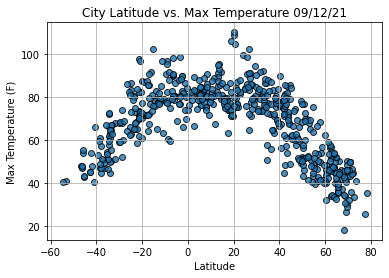

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

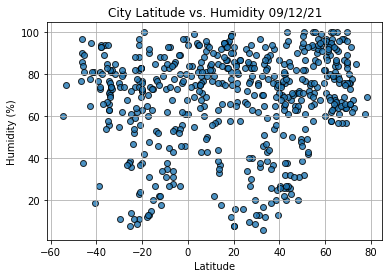

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

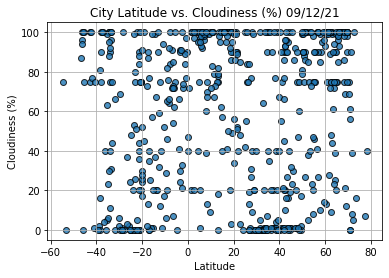

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

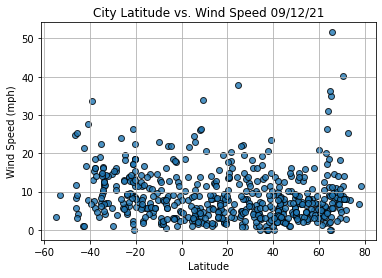

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

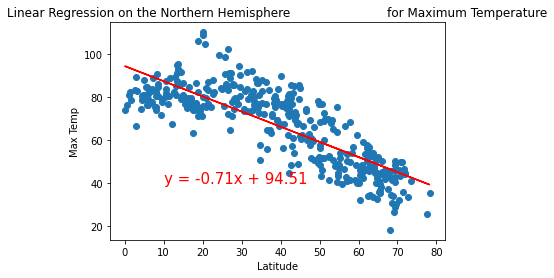

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

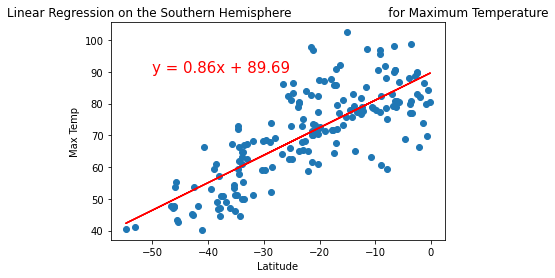

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

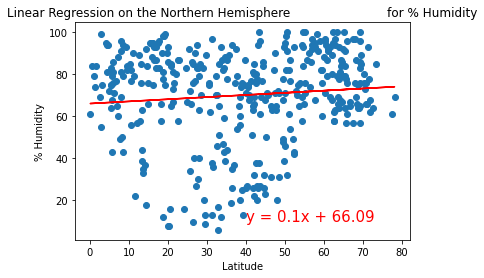

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

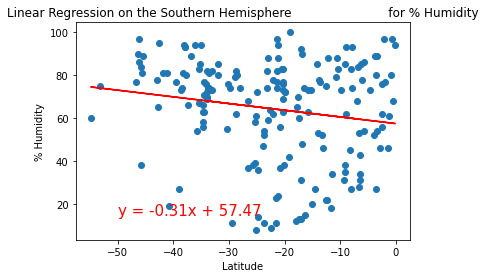

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

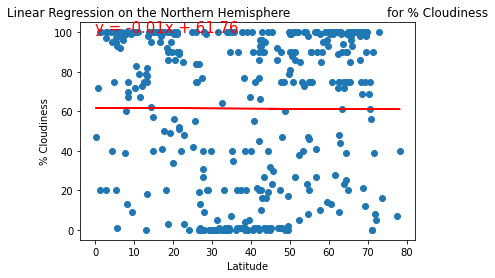

In [35]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,100))

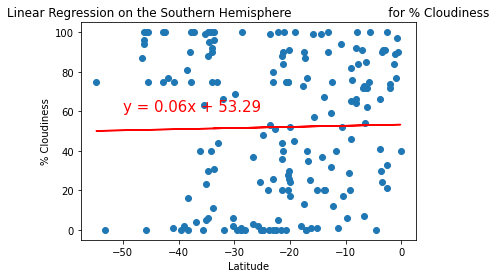

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

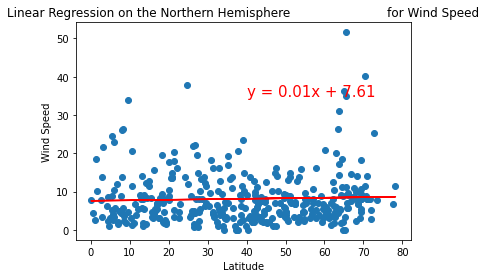

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

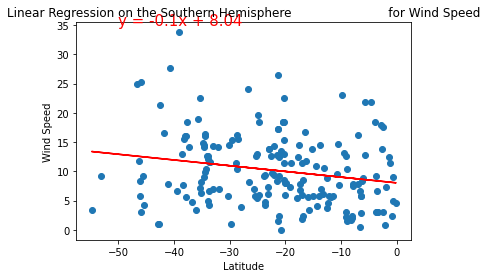

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))